In [2]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
import wittgenstein as lw
from sklearn.svm import SVC 
from sklearn import tree
import warnings
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import datetime as dt


In [3]:
#Read CSV file into data frame
NoShow_Initialdata=pd.read_csv('C:/Users/kanka/OneDrive/Desktop/Fall 2019/ML/Project/noshowappointments/NoShowDataset.csv',delimiter=',')

In [4]:
#NoShow_Initialdata.dtypes
#print(NoShow_Initialdata)
print('The initial distribution of target values counts in No-show target column')
print(NoShow_Initialdata['No-show'].value_counts())




The initial distribution of target values counts in No-show target column
No     88208
Yes    22319
Name: No-show, dtype: int64


In [5]:
#calculating the number of days from the scheduled time to actual appointment time
NoShow_Initialdata['ScheduledDay']=pd.to_datetime(NoShow_Initialdata['ScheduledDay'])
NoShow_Initialdata['AppointmentDay']=pd.to_datetime(NoShow_Initialdata['AppointmentDay'])
NoShow_Initialdata['NumberOfDays']=(NoShow_Initialdata['AppointmentDay']-NoShow_Initialdata['ScheduledDay']).dt.days
NoShow_Finaldata=NoShow_Initialdata.drop(['ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1)

#checking that number of days is not in negatives
NoShow_Finaldata=NoShow_Finaldata[(NoShow_Finaldata['NumberOfDays']) > -1]

#Checking age is not less than zero
NoShow_Finaldata=NoShow_Finaldata[(NoShow_Finaldata['Age']) > 0]
print(NoShow_Finaldata)
print(NoShow_Finaldata['No-show'].value_counts())

           PatientId  AppointmentID Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772      F   76            0             1   
6       7.336880e+14        5630279      F   23            0             0   
7       3.449830e+12        5630575      F   39            0             0   
9       7.812460e+13        5629123      F   19            0             0   
10      7.345360e+14        5630213      F   30            0             0   
11      7.542950e+12        5620163      M   29            0             0   
12      5.666550e+14        5634718      F   22            1             0   
13      9.113950e+14        5636249      M   28            0             0   
14      9.988470e+13        5633951      F   54            0             0   
15      9.994839e+10        5620206      F   15            0             0   
16      8.457440e+13        5633121      M   50            0             0   
17      1.479500e+13        5633460      F   40            1    

In [6]:
encode_category=LabelEncoder()

In [7]:
NoShow_Finaldata['Gender']=encode_category.fit_transform(NoShow_Finaldata['Gender'])

NoShow_Finaldata.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,NumberOfDays
5,9.598510e+13,5626772,0,76,0,1,0,0,0,0,No,1
6,7.336880e+14,5630279,0,23,0,0,0,0,0,0,Yes,1
7,3.449830e+12,5630575,0,39,0,0,0,0,0,0,Yes,1
9,7.812460e+13,5629123,0,19,0,0,0,0,0,0,No,1
10,7.345360e+14,5630213,0,30,0,0,0,0,0,0,No,1


In [8]:
#Gender_Encoded = pd.get_dummies(NoShow_Finaldata['Gender'],drop_first=True)

#NoShow_Finaldata = pd.concat([NoShow_Finaldata,Gender_Encoded ], axis =1)

#NoShow_Finaldata.drop(['Gender'], axis =1)

In [9]:
y = NoShow_Finaldata['No-show']
x = NoShow_Finaldata.drop('No-show', axis=1)
print(x)

           PatientId  AppointmentID  Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772       0   76            0             1   
6       7.336880e+14        5630279       0   23            0             0   
7       3.449830e+12        5630575       0   39            0             0   
9       7.812460e+13        5629123       0   19            0             0   
10      7.345360e+14        5630213       0   30            0             0   
11      7.542950e+12        5620163       1   29            0             0   
12      5.666550e+14        5634718       0   22            1             0   
13      9.113950e+14        5636249       1   28            0             0   
14      9.988470e+13        5633951       0   54            0             0   
15      9.994839e+10        5620206       0   15            0             0   
16      8.457440e+13        5633121       1   50            0             0   
17      1.479500e+13        5633460       0   40    

[0.29262588 0.30937395 0.01811031 0.1981272  0.00743399 0.00670858
 0.006984   0.00441199 0.00557889 0.00973379 0.14091141]


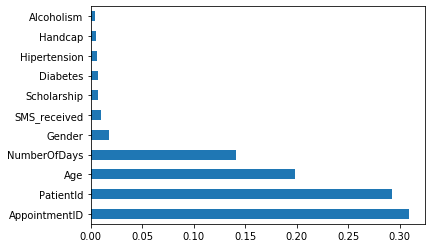

In [10]:
warnings.filterwarnings("ignore")
#Feature selection based on it's importance
model =  RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [11]:
#Recursive Feature Selection wrapper method

from sklearn.feature_selection import RFE

warnings.filterwarnings("ignore")
Random_model =  RandomForestClassifier()
rfe = RFE(Random_model, 10)
rfe_object = rfe.fit_transform(x,y)

Random_model.fit(x,y)              
temp = pd.Series(rfe.support_,index=x.columns)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)
print(rfe.support_)
print(rfe.ranking_)

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Handcap', 'SMS_received', 'NumberOfDays'],
      dtype='object')
[ True  True  True  True  True  True  True False  True  True  True]
[1 1 1 1 1 1 1 2 1 1 1]


In [12]:
x = NoShow_Finaldata.drop(['Alcoholism','No-show'],axis=1)
y = NoShow_Finaldata['No-show']

print(x)

           PatientId  AppointmentID  Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772       0   76            0             1   
6       7.336880e+14        5630279       0   23            0             0   
7       3.449830e+12        5630575       0   39            0             0   
9       7.812460e+13        5629123       0   19            0             0   
10      7.345360e+14        5630213       0   30            0             0   
11      7.542950e+12        5620163       1   29            0             0   
12      5.666550e+14        5634718       0   22            1             0   
13      9.113950e+14        5636249       1   28            0             0   
14      9.988470e+13        5633951       0   54            0             0   
15      9.994839e+10        5620206       0   15            0             0   
16      8.457440e+13        5633121       1   50            0             0   
17      1.479500e+13        5633460       0   40    

In [13]:
sm = SMOTE()

#Initial number of 'Yes' and 'No'
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Initial count of distribution of outcome")
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)


#Applied smote alogorithm
x, y = sm.fit_sample(x, y)

#values after smote algorithm
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Smote distribution outcome")
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)







Initial count of distribution of outcome
Unique Values :  ['No' 'Yes']
Occurrence Count :  [49894 19934]
Smote distribution outcome
Unique Values :  ['No' 'Yes']
Occurrence Count :  [49894 49894]


Text(0, 0.5, 'Accuracy_rate')

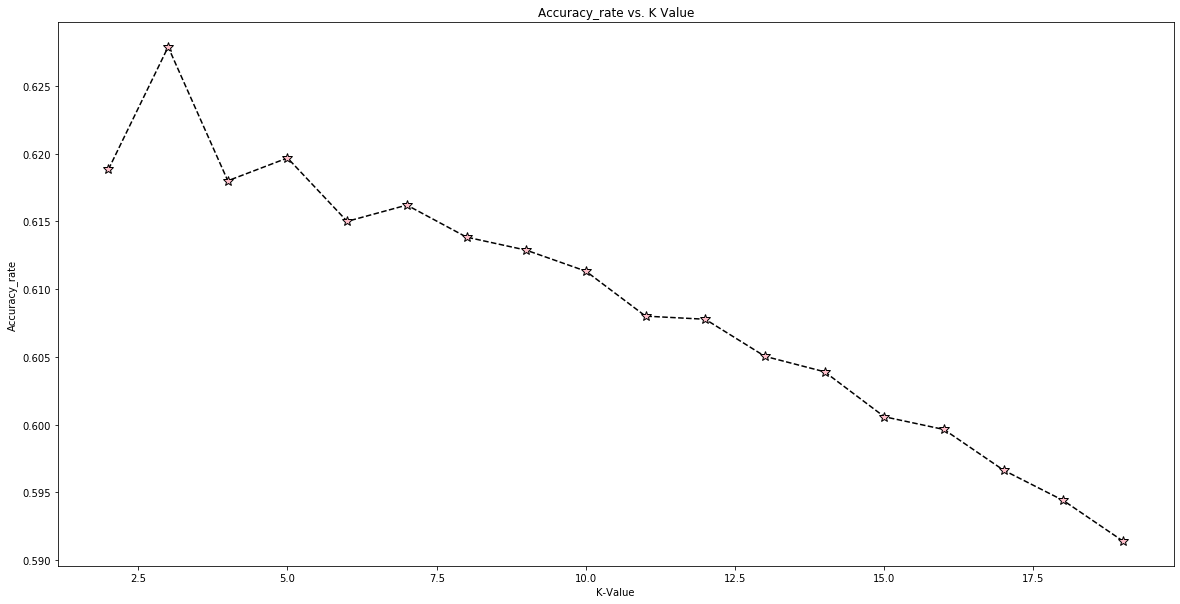

In [14]:
Accuracy_rate = []
for i in range (2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
# calculate scores
    cv_scores = cross_val_score(knn, x, y, cv=10)

    Accuracy_rate.append(cv_scores.mean())
   # print(i)
    #print(cv_scores.mean())

    
    
plt.figure(figsize=(20,10))
plt.plot(range(2,20),Accuracy_rate,color='black', linestyle='dashed',marker='*',markerfacecolor='pink', markersize=10)
plt.title('Accuracy_rate vs. K Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy_rate')

[0.59408818 0.57895792 0.58557114 0.57955912 0.63579876 0.63910603
 0.63750251 0.63389457 0.6487272  0.66366005]
Accuracy of KNN model after k-cross validation
0.6196865468760733
Confusion matrix for KNN
[[29339 20555]
 [17396 32498]]
              precision    recall  f1-score   support

          No       0.63      0.59      0.61     49894
         Yes       0.61      0.65      0.63     49894

    accuracy                           0.62     99788
   macro avg       0.62      0.62      0.62     99788
weighted avg       0.62      0.62      0.62     99788

0.8494136163286764


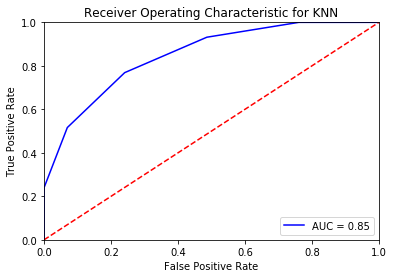

In [25]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x,y)
# calculate scores
cv_scores = cross_val_score(neigh, x, y, cv=10)
print(cv_scores)
print('Accuracy of KNN model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(neigh, x, y, cv=10)
print('Confusion matrix for KNN')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = neigh.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[0.49599198 0.50310621 0.50390782 0.5006012  0.50090198 0.50210463
 0.50330728 0.50551213 0.50591301 0.49198236]
Accuracy of Navie-Bayes model after k-cross validation
0.5013328601480371
Confusion matrix for Navie-Bayes
[[40186  9708]
 [40053  9841]]
              precision    recall  f1-score   support

          No       0.50      0.81      0.62     49894
         Yes       0.50      0.20      0.28     49894

    accuracy                           0.50     99788
   macro avg       0.50      0.50      0.45     99788
weighted avg       0.50      0.50      0.45     99788

0.5017812472828413


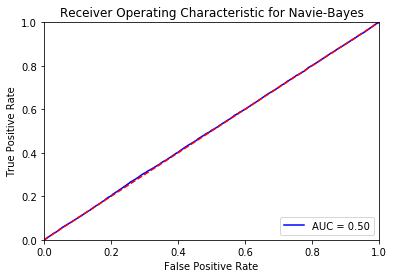

In [27]:
# Naves bayes algorithm
NavieBayes = GaussianNB()
#train the algorithm on training data 
NavieBayes.fit(x,y)
#predict using the testing data
# calculate scores
cv_scores = cross_val_score(NavieBayes, x, y, cv=10)
print(cv_scores)
print('Accuracy of Navie-Bayes model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(NavieBayes, x, y, cv=10)
print('Confusion matrix for Navie-Bayes')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = NavieBayes.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Navie-Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

#Linear Regression algorithm
LinearLogisticModel = LogisticRegression()
LinearLogisticModel.fit(x,y)
# calculate scores
cv_scores = cross_val_score(LinearLogisticModel, x, y, cv=10)
print(cv_scores)
print('Accuracy of LogisticRegression model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(LinearLogisticModel, x, y, cv=10)
print('confusion matrix')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = LinearLogisticModel.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds)

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for LogisticRegressionModel')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[0.48527054 0.5        0.4992986  0.50130261 0.71326919 0.67939467
 0.74974945 0.72960513 0.74764482 0.80837843]
Accuracy of DecisionTree model after k-cross validation
0.6413913435208762
confusion matrix
[[41093  8801]
 [26985 22909]]
              precision    recall  f1-score   support

          No       0.60      0.82      0.70     49894
         Yes       0.72      0.46      0.56     49894

    accuracy                           0.64     99788
   macro avg       0.66      0.64      0.63     99788
weighted avg       0.66      0.64      0.63     99788

0.7432950726426302


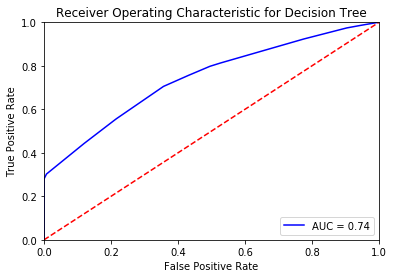

In [17]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
decision_tree.fit(x,y)
cv_scores = cross_val_score(decision_tree, x, y, cv=10)
print(cv_scores)
print('Accuracy of DecisionTree model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(decision_tree, x, y, cv=10)
print('Confusion matrix for Decision Tree model')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = decision_tree.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[0.52935872 0.53036072 0.53026052 0.43426854 0.88103828 0.87121668
 0.87793145 0.88875526 0.8801363  0.83333333]
Accuracy of RandomForest model after k-cross validation
0.7256659801864703
confusion matrix
[[40768  9126]
 [18204 31690]]
              precision    recall  f1-score   support

          No       0.69      0.82      0.75     49894
         Yes       0.78      0.64      0.70     49894

    accuracy                           0.73     99788
   macro avg       0.73      0.73      0.72     99788
weighted avg       0.73      0.73      0.72     99788

1.0


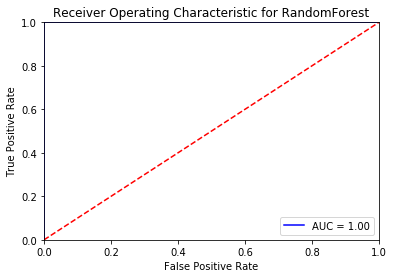

In [18]:
RandomForest=RandomForestClassifier(n_estimators=100)
RandomForest.fit(x,y)
cv_scores = cross_val_score(RandomForest, x, y, cv=10)
print(cv_scores)
print('Accuracy of RandomForest model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(RandomForest, x, y, cv=10)
print('Confusion matrix for Random Forest model')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = RandomForest.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for RandomForest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [19]:
import wittgenstein as lw
from sklearn.metrics import precision_score, recall_score

Train, Test  = train_test_split(NoShow_Finaldata, test_size=.33,random_state=42)

RuleBase =  lw.RIPPER()
RuleBase.fit(Train, class_feat='No-show', pos_class='Yes', random_state = 42)

#pred = RuleBase.predict(Test)
#print(confusion_matrix(Test, pred))
#print(classification_report(Test,pred))

X_test = Test.drop('No-show', axis=1)
y_test = Test['No-show']
# Collect performance metrics
p_value= RuleBase.score(X_test, y_test, precision_score)
r_value = RuleBase.score(X_test, y_test, recall_score)

accuracy_value = (2*p_value*r_value)/(p_value+r_value)
cond_count = RuleBase.ruleset_.count_conds()
    
print("Precision of rule based model trained with positive target value :") 
print(p_value)
print("Recall of rule based model trained with positive target value :")
print(r_value)
#print("Accuracy of rule based model trained with positive target value :")
#print(accuracy_value)
print("Number of conditions in rules:")
print(cond_count)
print("Rules extracted when trained with positive target value")
RuleBase.ruleset_.out_pretty()



Precision of rule based model trained with positive target value :
0.5098039215686274
Recall of rule based model trained with positive target value :
0.007885956930542918
Number of conditions in rules:
7
Rules extracted when trained with positive target value
[[Hipertension=0^Scholarship=1^Alcoholism=1] V
[Hipertension=0^AppointmentID=5565689-5604946^SMS_received=0^Age=42-50]]


In [20]:
import wittgenstein as lw
from sklearn.metrics import precision_score, recall_score

Train, Test  = train_test_split(NoShow_Finaldata, test_size=.33,random_state=42)

RuleBase =  lw.RIPPER()
RuleBase.fit(Train, class_feat='No-show', pos_class='No', random_state = 42)

#pred = RuleBase.predict(Test)
#print(confusion_matrix(Test, pred))
#print(classification_report(Test,pred))

X_test = Test.drop('No-show', axis=1)
y_test = Test['No-show']
# Collect performance metrics
p_value= RuleBase.score(X_test, y_test, precision_score)
r_value = RuleBase.score(X_test, y_test, recall_score)
#accuracy_value = (2*p_value*r_value)/(p_value+r_value)
cond_count = RuleBase.ruleset_.count_conds()
    
print("Precision of rule based model trained with negative target value:") 
print(p_value)
print("Recall rule based model trained with negative target value :")
print(r_value)
#print("Accuracy of rule based model trained with negative target value :")
#print(accuracy_value)
print("Number of conditions in rules:")
print(cond_count)
print("Rules extracted when trained with negative target value")
RuleBase.ruleset_.out_pretty()




Precision of rule based model trained with negative target value:
0.7326732673267327
Recall rule based model trained with negative target value :
0.43635258358662615
Number of conditions in rules:
2
Rules extracted when trained with negative target value
[[NumberOfDays=0-2] V
[SMS_received=1]]


[0.52715431 0.52645291 0.5238477  0.42675351 0.86069353 0.85668471
 0.86981359 0.86981359 0.85167368 0.82030467]
Accuracy of Bagging ensemble model after k-cross validation
0.7133192181115087
confusion matrix
[[40098  9796]
 [18525 31369]]
              precision    recall  f1-score   support

          No       0.68      0.80      0.74     49894
         Yes       0.76      0.63      0.69     49894

    accuracy                           0.72     99788
   macro avg       0.72      0.72      0.71     99788
weighted avg       0.72      0.72      0.71     99788

0.9994087429273578


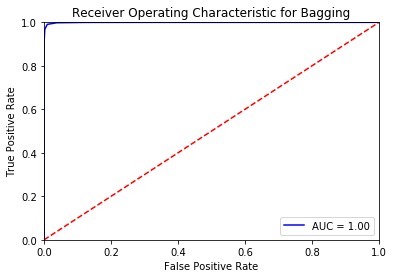

In [21]:
Bagging_Model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
Bagging_Model.fit(x,y)

cv_scores = cross_val_score(Bagging_Model, x, y, cv=10)
print(cv_scores)
print('Accuracy of Bagging ensemble model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(Bagging_Model, x, y, cv=10)
print('Confusion matrix for Bagging ensemble model')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = Bagging_Model.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Bagging')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[0.52755511 0.51713427 0.52104208 0.44699399 0.84916817 0.86129485
 0.86470235 0.89406695 0.86901183 0.86971337]
Accuracy of Ada_boosting classifier model after k-cross validation
0.7220682957416136
Confusion matrix of Ada_boosting ensemble model
[[44556  5338]
 [22398 27496]]
              precision    recall  f1-score   support

          No       0.67      0.89      0.76     49894
         Yes       0.84      0.55      0.66     49894

    accuracy                           0.72     99788
   macro avg       0.75      0.72      0.71     99788
weighted avg       0.75      0.72      0.71     99788

0.8073143651144026


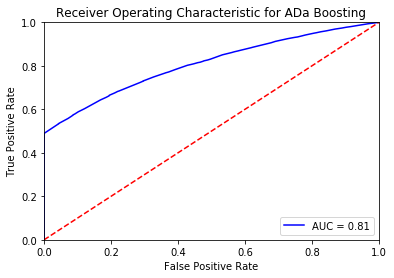

In [22]:
Ada_boosting = AdaBoostClassifier(n_estimators=100)
Ada_boosting.fit(x,y)
cv_scores = cross_val_score(Ada_boosting, x, y, cv=10)
print(cv_scores)
print('Accuracy of Ada_boosting classifier model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(Ada_boosting, x, y, cv=10)
print('Confusion matrix of Ada_boosting ensemble model')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = Ada_boosting.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for ADa Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[0.5009018  0.49869739 0.49699399 0.45931864 0.8811385  0.88785328
 0.89476849 0.9178192  0.9124073  0.9178192 ]
Accuracy of XGboosting ensemble model after k-cross validation
0.7367717796788205
Confusion matrix of XGboosting ensemble model 
[[46936  2958]
 [23311 26583]]
              precision    recall  f1-score   support

          No       0.67      0.94      0.78     49894
         Yes       0.90      0.53      0.67     49894

    accuracy                           0.74     99788
   macro avg       0.78      0.74      0.73     99788
weighted avg       0.78      0.74      0.73     99788

0.8254164763077336


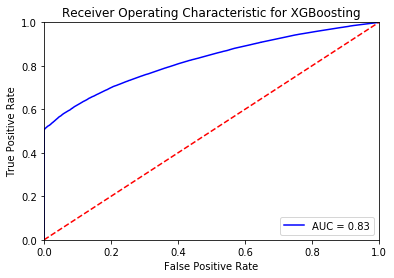

In [23]:
import xgboost
XG_Boosting = xgboost.XGBClassifier()
XG_Boosting.fit(x,y)
cv_scores = cross_val_score(XG_Boosting, x, y, cv=10)
print(cv_scores)
print('Accuracy of XGboosting ensemble model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(XG_Boosting, x, y, cv=10)
print('Confusion matrix of XGboosting ensemble model ')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = XG_Boosting.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for XGBoosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[0.59408818 0.57895792 0.58557114 0.57955912 0.63579876 0.63910603
 0.63750251 0.63389457 0.6487272  0.66366005]
Accuracy of Rule-Based classifier after k-cross validation
0.6196865468760733
confusion matrix
[[49894     0]
 [49894     0]]
              precision    recall  f1-score   support

          No       0.50      1.00      0.67     49894
         Yes       0.00      0.00      0.00     49894

    accuracy                           0.50     99788
   macro avg       0.25      0.50      0.33     99788
weighted avg       0.25      0.50      0.33     99788

0.5


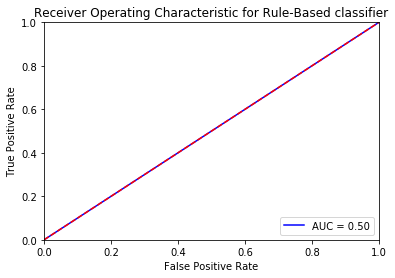

In [24]:
from sklearn.dummy import DummyClassifier
RuleBased_Clf = DummyClassifier(strategy="most_frequent")
RuleBased_Clf.fit(x,y)
# calculate scores
cv_scores = cross_val_score(neigh, x, y, cv=10)
print(cv_scores)
print('Accuracy of Rule-Based classifier after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(RuleBased_Clf, x, y, cv=10)
print('confusion matrix')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = RuleBased_Clf.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Rule-Based classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
